### Project Source: https://www.youtube.com/watch?v=baqxBO4PhI8
### Weather Data Taken From: https://www.ncdc.noaa.gov/cdo-web/search
### Authors: Caleb Tolman, Awab Attieh, Asfandyar Kahn, Nick Strub
# Import and Prepare Data:

In [1]:
import pandas as pd

# import the data, make DATE the index column
weather = pd.read_csv("Boise1970-Mar2024.csv", index_col="DATE")

weather
# There are many NaN values, so we have to get rid of these

,STATION,NAME,ACMH,ACSH,AWND,FMTM,PGTM,PRCP,PSUN,SNOW,...,WT14,WT15,WT16,WT17,WT18,WT19,WT21,WT22,WV01,WV03
DATE,,,,,,,,,,,,,,,,,,,,,
1970-01-01,USW00024131,"BOISE AIR TERMINAL, ID US",10.0,0.0,NaN,NaN,1030.0,0.00,100.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1970-01-02,USW00024131,"BOISE AIR TERMINAL, ID US",60.0,50.0,NaN,NaN,1354.0,0.00,75.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1970-01-03,USW00024131,"BOISE AIR TERMINAL, ID US",20.0,0.0,NaN,NaN,1012.0,0.00,100.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1970-01-04,USW00024131,"BOISE AIR TERMINAL, ID US",100.0,100.0,NaN,NaN,330.0,0.07,0.0,1.4,...,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN
1970-01-05,USW00024131,"BOISE AIR TERMINAL, ID US",80.0,90.0,NaN,NaN,1448.0,0.00,70.0,0.0,...,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-03-27,USW00024131,"BOISE AIR TERMINAL, ID US",NaN,NaN,12.30,NaN,NaN,0.08,NaN,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2024-03-28,USW00024131,"BOISE AIR TERMINAL, ID US",NaN,NaN,7.16,NaN,NaN,0.55,NaN,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2024-03-29,USW00024131,"BOISE AIR TERMINAL, ID US",NaN,NaN,6.49,NaN,NaN,0.00,NaN,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [2]:
# Get the percentage of null values in each column
null_pct = weather.apply(pd.isnull).sum()/weather.shape[0]

null_pct

STATION    0.000000
NAME       0.000000
ACMH       0.522307
ACSH       0.522307
AWND       0.258050
FMTM       0.485717
PGTM       0.271828
PRCP       0.000000
PSUN       0.744776
SNOW       0.000000
SNWD       0.000000
TAVG       0.662108
TMAX       0.000000
TMIN       0.000000
TSUN       0.363430
WDF1       0.953821
WDF2       0.477743
WDF5       0.478803
WDFG       0.526547
WDFM       0.660694
WESD       0.680024
WSF1       0.953770
WSF2       0.477743
WSF5       0.478752
WSFG       0.526395
WSFM       0.660694
WT01       0.801050
WT02       0.948572
WT03       0.961038
WT04       0.993843
WT05       0.984758
WT06       0.994701
WT07       0.993136
WT08       0.897396
WT09       0.997325
WT10       0.999849
WT11       0.998536
WT13       0.935551
WT14       0.997174
WT15       0.999546
WT16       0.748309
WT17       0.997779
WT18       0.899566
WT19       0.994650
WT21       0.999849
WT22       0.988594
WV01       0.999950
WV03       0.998890
dtype: float64

In [3]:
# Remove the colums with null value percentage less than 5%
valid_columns = weather.columns[null_pct < .05]

valid_columns

Index(['STATION', 'NAME', 'PRCP', 'SNOW', 'SNWD', 'TMAX', 'TMIN'], dtype='object')

In [4]:
# Make the weather dataset only contain the valid columns
weather = weather[valid_columns].copy()

# Make the column names lowercase
weather.columns = weather.columns.str.lower()

weather

,station,name,prcp,snow,snwd,tmax,tmin
DATE,,,,,,,
1970-01-01,USW00024131,"BOISE AIR TERMINAL, ID US",0.00,0.0,0.0,30,13
1970-01-02,USW00024131,"BOISE AIR TERMINAL, ID US",0.00,0.0,0.0,33,17
1970-01-03,USW00024131,"BOISE AIR TERMINAL, ID US",0.00,0.0,0.0,34,17
1970-01-04,USW00024131,"BOISE AIR TERMINAL, ID US",0.07,1.4,0.0,26,19
1970-01-05,USW00024131,"BOISE AIR TERMINAL, ID US",0.00,0.0,1.0,27,12
...,...,...,...,...,...,...,...
2024-03-27,USW00024131,"BOISE AIR TERMINAL, ID US",0.08,0.0,0.0,57,37
2024-03-28,USW00024131,"BOISE AIR TERMINAL, ID US",0.55,0.0,0.0,52,37
2024-03-29,USW00024131,"BOISE AIR TERMINAL, ID US",0.00,0.0,0.0,58,35


In [5]:
# Check again if there are null values in the data
weather.apply(pd.isnull).sum()
# There are no NaN values in this data

station    0
name       0
prcp       0
snow       0
snwd       0
tmax       0
tmin       0
dtype: int64

In [6]:
# See the data types of the columns
weather.dtypes

station     object
name        object
prcp       float64
snow       float64
snwd       float64
tmax         int64
tmin         int64
dtype: object

In [7]:
# Check the index data type
weather.index

Index(['1970-01-01', '1970-01-02', '1970-01-03', '1970-01-04', '1970-01-05',
       '1970-01-06', '1970-01-07', '1970-01-08', '1970-01-09', '1970-01-10',
       ...
       '2024-03-22', '2024-03-23', '2024-03-24', '2024-03-25', '2024-03-26',
       '2024-03-27', '2024-03-28', '2024-03-29', '2024-03-30', '2024-03-31'],
      dtype='object', name='DATE', length=19814)

In [8]:
# Convert index to datetime data type
weather.index = pd.to_datetime(weather.index)

# Check the index data type again
weather.index

DatetimeIndex(['1970-01-01', '1970-01-02', '1970-01-03', '1970-01-04',
               '1970-01-05', '1970-01-06', '1970-01-07', '1970-01-08',
               '1970-01-09', '1970-01-10',
               ...
               '2024-03-22', '2024-03-23', '2024-03-24', '2024-03-25',
               '2024-03-26', '2024-03-27', '2024-03-28', '2024-03-29',
               '2024-03-30', '2024-03-31'],
              dtype='datetime64[ns]', name='DATE', length=19814, freq=None)

In [9]:
# Count how many records there are for each year
weather.index.year.value_counts().sort_index()

DATE
1970    365
1971    365
1972    366
1973    365
1974    365
1975    365
1976    366
1977    365
1978    365
1979    365
1980    366
1981    365
1982    365
1983    365
1984    366
1985    365
1986    365
1987    365
1988    366
1989    365
1990    365
1991    365
1992    366
1993    365
1994    365
1995    365
1996    366
1997    365
1998    365
1999    365
2000    366
2001    365
2002    365
2003    365
2004    366
2005    365
2006    365
2007    365
2008    366
2009    365
2010    365
2011    365
2012    366
2013    365
2014    365
2015    365
2016    366
2017    365
2018    365
2019    365
2020    366
2021    365
2022    365
2023    365
2024     91
Name: count, dtype: int64

<Axes: xlabel='DATE'>

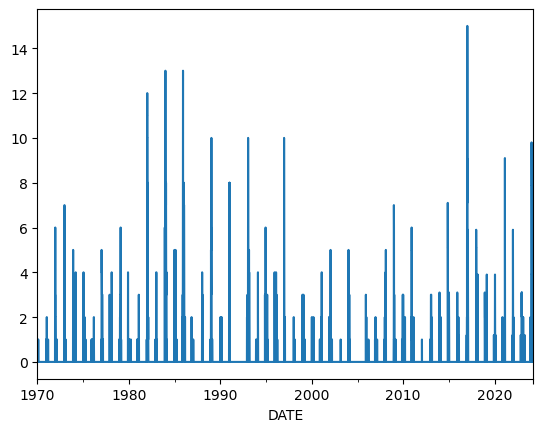

In [10]:
# Make a bar graph of how much snow depth there is every day
weather["snwd"].plot()

<Axes: xlabel='DATE'>

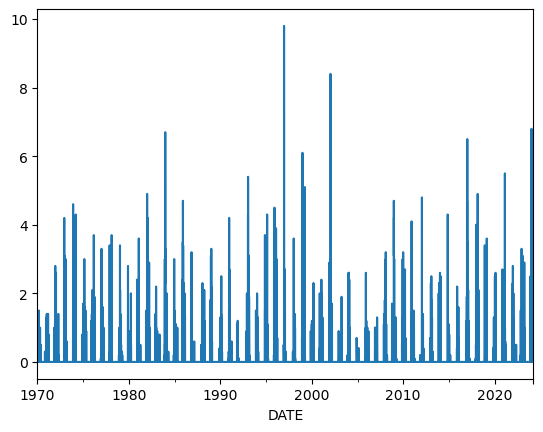

In [11]:
# Bar graph for snow
weather['snow'].plot()

<Axes: xlabel='DATE'>

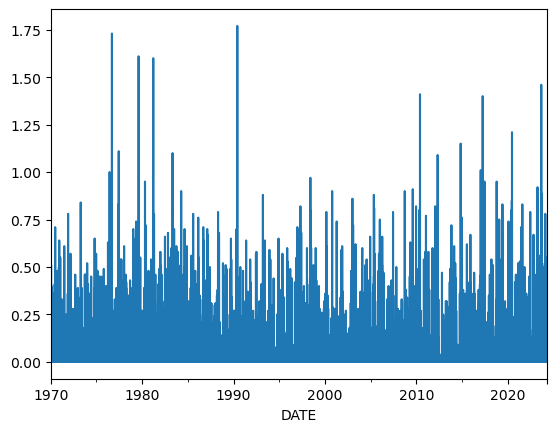

In [12]:
# Bar graph for precipitation
weather['prcp'].plot()

<Axes: xlabel='DATE'>

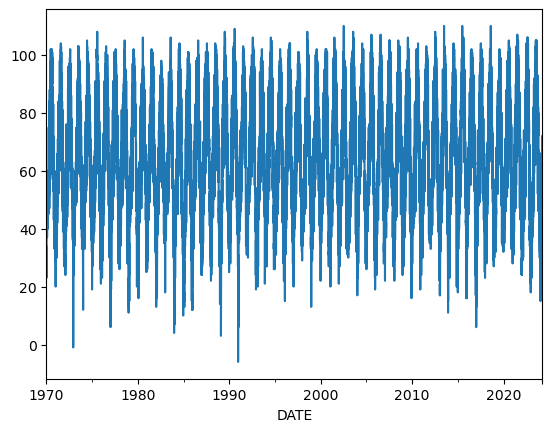

In [13]:
# Plot max. temperature
weather['tmax'].plot()
# This is a line plot by default, which is why this one does not look like a bar graph

<Axes: xlabel='DATE'>

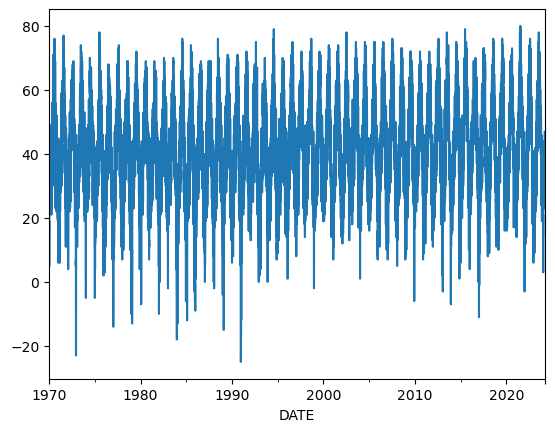

In [14]:
# Plot min. temperature
weather['tmin'].plot()

In [15]:
# We want to predict the next day's tmax

# Make a new column called 'target' that is the next day's tmax
weather["target"] = weather.shift(-1)["tmax"]

weather

,station,name,prcp,snow,snwd,tmax,tmin,target
DATE,,,,,,,,
1970-01-01,USW00024131,"BOISE AIR TERMINAL, ID US",0.00,0.0,0.0,30,13,33.0
1970-01-02,USW00024131,"BOISE AIR TERMINAL, ID US",0.00,0.0,0.0,33,17,34.0
1970-01-03,USW00024131,"BOISE AIR TERMINAL, ID US",0.00,0.0,0.0,34,17,26.0
1970-01-04,USW00024131,"BOISE AIR TERMINAL, ID US",0.07,1.4,0.0,26,19,27.0
1970-01-05,USW00024131,"BOISE AIR TERMINAL, ID US",0.00,0.0,1.0,27,12,23.0
...,...,...,...,...,...,...,...,...
2024-03-27,USW00024131,"BOISE AIR TERMINAL, ID US",0.08,0.0,0.0,57,37,52.0
2024-03-28,USW00024131,"BOISE AIR TERMINAL, ID US",0.55,0.0,0.0,52,37,58.0
2024-03-29,USW00024131,"BOISE AIR TERMINAL, ID US",0.00,0.0,0.0,58,35,60.0


In [16]:
# The last element in target is NaN since there is no next day tmax; fill it with previous day's data
weather = weather.ffill()

weather

,station,name,prcp,snow,snwd,tmax,tmin,target
DATE,,,,,,,,
1970-01-01,USW00024131,"BOISE AIR TERMINAL, ID US",0.00,0.0,0.0,30,13,33.0
1970-01-02,USW00024131,"BOISE AIR TERMINAL, ID US",0.00,0.0,0.0,33,17,34.0
1970-01-03,USW00024131,"BOISE AIR TERMINAL, ID US",0.00,0.0,0.0,34,17,26.0
1970-01-04,USW00024131,"BOISE AIR TERMINAL, ID US",0.07,1.4,0.0,26,19,27.0
1970-01-05,USW00024131,"BOISE AIR TERMINAL, ID US",0.00,0.0,1.0,27,12,23.0
...,...,...,...,...,...,...,...,...
2024-03-27,USW00024131,"BOISE AIR TERMINAL, ID US",0.08,0.0,0.0,57,37,52.0
2024-03-28,USW00024131,"BOISE AIR TERMINAL, ID US",0.55,0.0,0.0,52,37,58.0
2024-03-29,USW00024131,"BOISE AIR TERMINAL, ID US",0.00,0.0,0.0,58,35,60.0


# Apply Machine Learning Model:

In [17]:
from sklearn.linear_model import Ridge

# Ridge regression is very similar to Linear regression, except it penalizes coefficients to account for multicollinearity 

# Initialize Ridge regression model
rr = Ridge(alpha=.1)
# The aplha parameter controls how much the coefficients are shrunk to account for collinearity

# Create a list of predictor columns to use to predict the target (daily max. temperature)
predictors = weather.columns[~weather.columns.isin(["target", "name", "station"])]
# Predictors are all columns except target, name, and station

predictors

Index(['prcp', 'snow', 'snwd', 'tmax', 'tmin'], dtype='object')

In [18]:
# We have time series data; It is in order of dates, therefore we cannot use cross-validation 
# We will use time series cross-validation (backtesting) to account for time series nature of the data

# Parameters from left to right: weather data frame, Ridge regression model, list of predictors, 10 years (3650 days) of data before starting predictions, generate predictions every 90 days
def backtest(weather, model, predictors, start=3650, step=90):
    
    # Create list, each element is a data frame of predictions for 90 days
    all_predictions = []

    # Start at start parameter, go up to end of the weather data set, advance 90 each time
    for i in range(start, weather.shape[0], step):
        
        # Each iteration, create training set to train model (all rows in data up to row i)
        train = weather.iloc[:i,:]
        # Create test set (rows i up to i + step)
        test = weather.iloc[i:(i+step),:]

        # Fit the model to data
        model.fit(train[predictors], train["target"])

        # Generate predictions
        preds = model.predict(test[predictors]) # returns numpy array (might be changing in new version of sklearn)

        # Convert predictions to pandas series, index is same as test data
        preds = pd.Series(preds, index=test.index)

        # Concatinate real test data in with our predictions, axis=1 means everything passed in is treated as a seperate column, default is axis=0 meaning treat everything as seperate rows
        combined = pd.concat([test["target"], preds], axis=1)

        # Name the columns
        combined.columns = ["actual", "prediction"]

        # Create column called diff = prediction - actual
        combined["diff"] = (combined["prediction"] - combined["actual"]).abs()

        # Append combined to all_predictions
        all_predictions.append(combined)

    # Return the list of data frames of predictions as one data frame
    return pd.concat(all_predictions)

In [19]:
# Generate predictions by calling backtest() with Ridge regression model
predictions = backtest(weather, rr, predictors)

predictions

,actual,prediction,diff
DATE,,,
1979-12-30,48.0,37.823496,10.176504
1979-12-31,45.0,49.072360,4.072360
1980-01-01,41.0,46.242105,5.242105
1980-01-02,37.0,42.479656,5.479656
1980-01-03,39.0,38.570046,0.429954
...,...,...,...
2024-03-27,52.0,57.263161,5.263161
2024-03-28,58.0,50.966768,7.033232
2024-03-29,60.0,58.445764,1.554236


In [20]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Generate accuracy metric

# Find average diff
mean_absolute_error(predictions["actual"], predictions["prediction"])
# On average, we were this many degrees off from the correct temperature

4.971459186901261

In [21]:
# Sort data by diff
predictions.sort_values("diff", ascending=False)

,actual,prediction,diff
DATE,,,
2012-06-04,57.0,91.372659,34.372659
1988-03-26,45.0,76.317862,31.317862
1993-11-22,30.0,57.623951,27.623951
2008-04-14,48.0,75.387302,27.387302
1997-01-11,20.0,47.072316,27.072316
...,...,...,...
1983-03-14,49.0,48.998390,0.001610
2018-10-27,67.0,67.001561,0.001561
2011-02-01,33.0,32.998918,0.001082


In [22]:
# Generate coefficients that represent relationship between the predictors and target
pd.Series(rr.coef_, index=predictors)
# For example, a coefficient of -3.4 for 'prcp' suggests an increase in 'prcp' leads to a decrease in target

prcp   -3.449230
snow   -0.105608
snwd   -0.159137
tmax    0.935051
tmin    0.014193
dtype: float64

# Improve Model Accuracy:

In [23]:
# Find month and day averages, make them columns

# Take data frame as input, look at each row in data frame, then take all the previous rows and the currrent row and return the mean of all the rows together
def expand_mean(df):
    return df.expanding(1).mean()

# Loop through each column in the list
for col in ["tmax", "tmin", "prcp"]:
    
    # Make new column with average for a given month for each column
    # Go through data, group by month (Ex. all Januarys will be together), go one by one through each month, then find mean of all dates before given date
    weather[f"month_avg_{col}"] = weather[col].groupby(weather.index.month, group_keys=False).apply(expand_mean)
    # Ex. Finding temp for Jan. 1 1974, use all Jan. temps from 1970 to 1973 for avg temp.

    # Make new column with average for a given day in a year for each column
    weather[f"day_avg_{col}"] = weather[col].groupby(weather.index.day_of_year, group_keys=False).apply(expand_mean)

weather

,station,name,prcp,snow,snwd,tmax,tmin,target,month_avg_tmax,day_avg_tmax,month_avg_tmin,day_avg_tmin,month_avg_prcp,day_avg_prcp
DATE,,,,,,,,,,,,,,
1970-01-01,USW00024131,"BOISE AIR TERMINAL, ID US",0.00,0.0,0.0,30,13,33.0,30.000000,30.000000,13.000000,13.000000,0.000000,0.000000
1970-01-02,USW00024131,"BOISE AIR TERMINAL, ID US",0.00,0.0,0.0,33,17,34.0,31.500000,33.000000,15.000000,17.000000,0.000000,0.000000
1970-01-03,USW00024131,"BOISE AIR TERMINAL, ID US",0.00,0.0,0.0,34,17,26.0,32.333333,34.000000,15.666667,17.000000,0.000000,0.000000
1970-01-04,USW00024131,"BOISE AIR TERMINAL, ID US",0.07,1.4,0.0,26,19,27.0,30.750000,26.000000,16.500000,19.000000,0.017500,0.070000
1970-01-05,USW00024131,"BOISE AIR TERMINAL, ID US",0.00,0.0,1.0,27,12,23.0,30.000000,27.000000,15.600000,12.000000,0.014000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-03-27,USW00024131,"BOISE AIR TERMINAL, ID US",0.08,0.0,0.0,57,37,52.0,54.420929,55.309091,33.501470,34.036364,0.045750,0.030727
2024-03-28,USW00024131,"BOISE AIR TERMINAL, ID US",0.55,0.0,0.0,52,37,58.0,54.419506,55.236364,33.503525,33.763636,0.046046,0.075636
2024-03-29,USW00024131,"BOISE AIR TERMINAL, ID US",0.00,0.0,0.0,58,35,60.0,54.421609,56.836364,33.504404,33.600000,0.046019,0.073455


In [24]:
# Find rolling averages, make them columns
# Calculate the average temp. and precip. in the past few days (past 3 days and 10 days) and look at how the current day compares to those days
# This will help if the current days temperature is abnormal

# Calculate percentage difference
def pct_diff(old, new):
    return (new - old) / old

# Find rolling averages for past few periods
# Parameters from right to left: weather dataframe, number of days to compute rolling average for, column name to compute rolling average on
def compute_rolling(weather, horizon, col):

    # Make string that is name of new column to create in our data frame
    label = f"rolling_{horizon}_{col}"

    # Make new column with label name, take col and compute rolling mean over horizon
    weather[label] = weather[col].rolling(horizon).mean()

    # Find percentage difference between current day and rolling
    weather[f"{label}_pct"] = pct_diff(weather[label], weather[col])
    
    return weather

# run for 3 day horzion and 10 day horizon
rolling_horizons = [3, 10]
for horizon in rolling_horizons:
    for col in ["tmax", "tmin", "prcp"]:
        weather = compute_rolling(weather, horizon, col)

weather
# Now we have a lot of rolling columns with NaN values in the beginning because if we find a 10-day rolling average, we dont have 10 days of historical data

,station,name,prcp,snow,snwd,tmax,tmin,target,month_avg_tmax,day_avg_tmax,...,rolling_3_tmin,rolling_3_tmin_pct,rolling_3_prcp,rolling_3_prcp_pct,rolling_10_tmax,rolling_10_tmax_pct,rolling_10_tmin,rolling_10_tmin_pct,rolling_10_prcp,rolling_10_prcp_pct
DATE,,,,,,,,,,,,,,,,,,,,,
1970-01-01,USW00024131,"BOISE AIR TERMINAL, ID US",0.00,0.0,0.0,30,13,33.0,30.000000,30.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1970-01-02,USW00024131,"BOISE AIR TERMINAL, ID US",0.00,0.0,0.0,33,17,34.0,31.500000,33.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1970-01-03,USW00024131,"BOISE AIR TERMINAL, ID US",0.00,0.0,0.0,34,17,26.0,32.333333,34.000000,...,15.666667,0.085106,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1970-01-04,USW00024131,"BOISE AIR TERMINAL, ID US",0.07,1.4,0.0,26,19,27.0,30.750000,26.000000,...,17.666667,0.075472,0.023333,2.000000,NaN,NaN,NaN,NaN,NaN,NaN
1970-01-05,USW00024131,"BOISE AIR TERMINAL, ID US",0.00,0.0,1.0,27,12,23.0,30.000000,27.000000,...,16.000000,-0.250000,0.023333,-1.000000,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-03-27,USW00024131,"BOISE AIR TERMINAL, ID US",0.08,0.0,0.0,57,37,52.0,54.420929,55.309091,...,34.000000,0.088235,0.043333,0.846154,62.1,-0.082126,39.2,-0.056122,0.054,0.481481
2024-03-28,USW00024131,"BOISE AIR TERMINAL, ID US",0.55,0.0,0.0,52,37,58.0,54.419506,55.236364,...,35.333333,0.047170,0.226667,1.426471,60.3,-0.137645,39.0,-0.051282,0.109,4.045872
2024-03-29,USW00024131,"BOISE AIR TERMINAL, ID US",0.00,0.0,0.0,58,35,60.0,54.421609,56.836364,...,36.333333,-0.036697,0.210000,-1.000000,59.0,-0.016949,38.5,-0.090909,0.109,-1.000000


In [25]:
# Remove first 10 rows to get rid of NaN values
weather = weather.iloc[14:,:]

weather
# There are still some NaN values because we are dividing by 0 or dividing 0

,station,name,prcp,snow,snwd,tmax,tmin,target,month_avg_tmax,day_avg_tmax,...,rolling_3_tmin,rolling_3_tmin_pct,rolling_3_prcp,rolling_3_prcp_pct,rolling_10_tmax,rolling_10_tmax_pct,rolling_10_tmin,rolling_10_tmin_pct,rolling_10_prcp,rolling_10_prcp_pct
DATE,,,,,,,,,,,,,,,,,,,,,
1970-01-15,USW00024131,"BOISE AIR TERMINAL, ID US",0.01,0.0,0.0,48,36,45.0,36.333333,48.000000,...,38.000000,-0.052632,0.156667,-0.936170,39.5,0.215190,28.0,0.285714,0.080,-0.875000
1970-01-16,USW00024131,"BOISE AIR TERMINAL, ID US",0.51,0.0,0.0,45,40,47.0,36.875000,45.000000,...,38.000000,0.052632,0.313333,0.627660,41.7,0.079137,31.2,0.282051,0.131,2.893130
1970-01-17,USW00024131,"BOISE AIR TERMINAL, ID US",0.31,0.0,0.0,47,40,46.0,37.470588,47.000000,...,38.666667,0.034483,0.276667,0.120482,43.9,0.070615,34.7,0.152738,0.162,0.913580
1970-01-18,USW00024131,"BOISE AIR TERMINAL, ID US",0.36,0.0,0.0,46,43,48.0,37.944444,46.000000,...,41.000000,0.048780,0.393333,-0.084746,44.9,0.024499,36.8,0.168478,0.198,0.818182
1970-01-19,USW00024131,"BOISE AIR TERMINAL, ID US",0.22,0.0,0.0,48,40,53.0,38.473684,48.000000,...,41.000000,-0.024390,0.296667,-0.258427,45.3,0.059603,37.6,0.063830,0.209,0.052632
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-03-27,USW00024131,"BOISE AIR TERMINAL, ID US",0.08,0.0,0.0,57,37,52.0,54.420929,55.309091,...,34.000000,0.088235,0.043333,0.846154,62.1,-0.082126,39.2,-0.056122,0.054,0.481481
2024-03-28,USW00024131,"BOISE AIR TERMINAL, ID US",0.55,0.0,0.0,52,37,58.0,54.419506,55.236364,...,35.333333,0.047170,0.226667,1.426471,60.3,-0.137645,39.0,-0.051282,0.109,4.045872
2024-03-29,USW00024131,"BOISE AIR TERMINAL, ID US",0.00,0.0,0.0,58,35,60.0,54.421609,56.836364,...,36.333333,-0.036697,0.210000,-1.000000,59.0,-0.016949,38.5,-0.090909,0.109,-1.000000


In [26]:
# Count how many NaN values are in each column
weather.apply(pd.isnull).sum()

station                    0
name                       0
prcp                       0
snow                       0
snwd                       0
tmax                       0
tmin                       0
target                     0
month_avg_tmax             0
day_avg_tmax               0
month_avg_tmin             0
day_avg_tmin               0
month_avg_prcp             0
day_avg_prcp               0
rolling_3_tmax             0
rolling_3_tmax_pct         0
rolling_3_tmin             0
rolling_3_tmin_pct         0
rolling_3_prcp             0
rolling_3_prcp_pct     10545
rolling_10_tmax            0
rolling_10_tmax_pct        0
rolling_10_tmin            0
rolling_10_tmin_pct        0
rolling_10_prcp            0
rolling_10_prcp_pct     4365
dtype: int64

In [27]:
# Fill the NaN values with 0
weather = weather.fillna(0)

# Count again how many NaN values are in each column
weather.apply(pd.isnull).sum()

station                0
name                   0
prcp                   0
snow                   0
snwd                   0
tmax                   0
tmin                   0
target                 0
month_avg_tmax         0
day_avg_tmax           0
month_avg_tmin         0
day_avg_tmin           0
month_avg_prcp         0
day_avg_prcp           0
rolling_3_tmax         0
rolling_3_tmax_pct     0
rolling_3_tmin         0
rolling_3_tmin_pct     0
rolling_3_prcp         0
rolling_3_prcp_pct     0
rolling_10_tmax        0
rolling_10_tmax_pct    0
rolling_10_tmin        0
rolling_10_tmin_pct    0
rolling_10_prcp        0
rolling_10_prcp_pct    0
dtype: int64

In [28]:
# Create new list of predictors with new columns added
predictors = weather.columns[~weather.columns.isin(["target", "name", "station"])]

predictors

Index(['prcp', 'snow', 'snwd', 'tmax', 'tmin', 'month_avg_tmax',
       'day_avg_tmax', 'month_avg_tmin', 'day_avg_tmin', 'month_avg_prcp',
       'day_avg_prcp', 'rolling_3_tmax', 'rolling_3_tmax_pct',
       'rolling_3_tmin', 'rolling_3_tmin_pct', 'rolling_3_prcp',
       'rolling_3_prcp_pct', 'rolling_10_tmax', 'rolling_10_tmax_pct',
       'rolling_10_tmin', 'rolling_10_tmin_pct', 'rolling_10_prcp',
       'rolling_10_prcp_pct'],
      dtype='object')

In [29]:
import numpy as np

# Count infinity values in each column
inf_count = weather[predictors].apply(lambda x: np.isinf(x).sum())

inf_count

prcp                   0
snow                   0
snwd                   0
tmax                   0
tmin                   0
month_avg_tmax         0
day_avg_tmax           0
month_avg_tmin         0
day_avg_tmin           0
month_avg_prcp         0
day_avg_prcp           0
rolling_3_tmax         0
rolling_3_tmax_pct     1
rolling_3_tmin         0
rolling_3_tmin_pct     3
rolling_3_prcp         0
rolling_3_prcp_pct     0
rolling_10_tmax        0
rolling_10_tmax_pct    0
rolling_10_tmin        0
rolling_10_tmin_pct    0
rolling_10_prcp        0
rolling_10_prcp_pct    0
dtype: int64

In [30]:
# Replace infinities with 0
for column in predictors:
    weather[column].replace([np.inf, -np.inf], 0, inplace=True)

# Again count infinite values in each column
inf_count = weather[predictors].apply(lambda x: np.isinf(x).sum())

inf_count

prcp                   0
snow                   0
snwd                   0
tmax                   0
tmin                   0
month_avg_tmax         0
day_avg_tmax           0
month_avg_tmin         0
day_avg_tmin           0
month_avg_prcp         0
day_avg_prcp           0
rolling_3_tmax         0
rolling_3_tmax_pct     0
rolling_3_tmin         0
rolling_3_tmin_pct     0
rolling_3_prcp         0
rolling_3_prcp_pct     0
rolling_10_tmax        0
rolling_10_tmax_pct    0
rolling_10_tmin        0
rolling_10_tmin_pct    0
rolling_10_prcp        0
rolling_10_prcp_pct    0
dtype: int64

# Re-run the Model:

In [31]:
# Call backtest() with new predictions
predictions = backtest(weather, rr, predictors)

# Get avg diff
mean_absolute_error(predictions["actual"], predictions["prediction"])

4.661536196729278

In [32]:
# Get mean squred error
mean_squared_error(predictions["actual"], predictions["prediction"])

35.593518798623165

In [33]:
# Sort data by the diff
predictions.sort_values("diff", ascending=False)

,actual,prediction,diff
DATE,,,
2012-06-04,57.0,87.843557,30.843557
1990-12-28,10.0,40.368670,30.368670
1988-03-26,45.0,70.979600,25.979600
1993-11-22,30.0,55.388550,25.388550
2013-05-21,58.0,82.072307,24.072307
...,...,...,...
1990-08-06,103.0,103.002591,0.002591
2012-01-04,46.0,45.997539,0.002461
2018-03-21,59.0,59.001532,0.001532


In [34]:
# Look at the data from a certain date range
weather.loc["2012-06-01": "2012-06-07"]
# To predict anomolous days, we would need more detailed atmospheric data, Ex. wind conditions, barometric pressure, cloud cover, etc.

,station,name,prcp,snow,snwd,tmax,tmin,target,month_avg_tmax,day_avg_tmax,...,rolling_3_tmin,rolling_3_tmin_pct,rolling_3_prcp,rolling_3_prcp_pct,rolling_10_tmax,rolling_10_tmax_pct,rolling_10_tmin,rolling_10_tmin_pct,rolling_10_prcp,rolling_10_prcp_pct
DATE,,,,,,,,,,,,,,,,,,,,,
2012-06-01,USW00024131,"BOISE AIR TERMINAL, ID US",0.00,0.0,0.0,89,57,85.0,81.041237,75.906977,...,52.333333,0.089172,0.000000,0.00,71.6,0.243017,47.8,0.192469,0.048,-1.000000
2012-06-02,USW00024131,"BOISE AIR TERMINAL, ID US",0.01,0.0,0.0,85,63,90.0,81.044374,77.767442,...,57.333333,0.098837,0.003333,2.00,73.8,0.151762,49.4,0.275304,0.049,-0.795918
2012-06-03,USW00024131,"BOISE AIR TERMINAL, ID US",0.00,0.0,0.0,90,55,93.0,81.051465,78.604651,...,58.333333,-0.057143,0.003333,-1.00,76.6,0.174935,51.0,0.078431,0.049,-1.000000
2012-06-04,USW00024131,"BOISE AIR TERMINAL, ID US",0.01,0.0,0.0,93,52,57.0,81.060918,78.069767,...,56.666667,-0.082353,0.006667,0.50,79.7,0.166876,51.7,0.005803,0.035,-0.714286
2012-06-05,USW00024131,"BOISE AIR TERMINAL, ID US",0.03,0.0,0.0,57,44,66.0,81.041897,76.069767,...,50.333333,-0.125828,0.013333,1.25,79.7,-0.284818,51.8,-0.150579,0.005,5.000000
2012-06-06,USW00024131,"BOISE AIR TERMINAL, ID US",0.00,0.0,0.0,66,37,80.0,81.030016,75.348837,...,44.333333,-0.165414,0.013333,-1.00,79.8,-0.172932,50.6,-0.268775,0.005,-1.000000
2012-06-07,USW00024131,"BOISE AIR TERMINAL, ID US",0.01,0.0,0.0,80,48,68.0,81.029203,76.790698,...,43.000000,0.116279,0.013333,-0.25,80.2,-0.002494,50.7,-0.053254,0.006,0.666667


<Axes: xlabel='diff'>

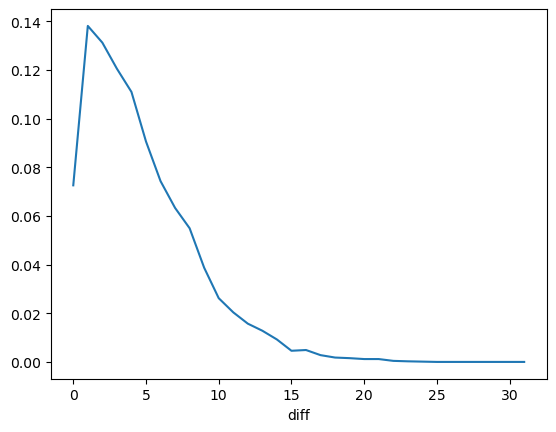

In [35]:
# Make plot to indicate how often we fall into each error bucket
(predictions["diff"].round().value_counts().sort_index() / predictions.shape[0]).plot()
# x axis: rounded diff, y axis: number of days with this diff / total days

In [36]:
# To continue improving accuracy:
# 1. Add more predictor columns
# 2. Use different horizons for rolling averages or compute different types of rolling predictors
# 3. Utilize original data with null values somehow
# 4. Use a different model (not Ridge regression)

# Predict Tomorrow's Weather:
### To predict the maximum temperature (TMAX) for a future day using the model, you have to provide the model with a DataFrame of one single day that contains the same types of data as was used to train the model, specifically the day preceding the day that is to be predicted. This DataFrame should include all relevant weather variables (such as precipitation, snowfall, snow depth, current day's maximum and minimum temperatures, rolling averages, etc.)

In [37]:
# import April data, make DATE the index column
apr_weather = pd.read_csv("BoiseApr2024.csv", index_col="DATE")

apr_weather
# There are many NaN values, so we have to get rid of these

,STATION,NAME,AWND,PGTM,PRCP,SNOW,SNWD,TAVG,TMAX,TMIN,WDF2,WDF5,WSF2,WSF5,WT01,WT03
DATE,,,,,,,,,,,,,,,,
2024-04-01,USW00024131,"BOISE AIR TERMINAL, ID US",8.28,NaN,0.00,0.0,0.0,48,64.0,34.0,300.0,300.0,23.9,34.0,NaN,NaN
2024-04-02,USW00024131,"BOISE AIR TERMINAL, ID US",4.92,NaN,0.00,0.0,0.0,53,71.0,39.0,120.0,120.0,15.0,19.9,NaN,NaN
2024-04-03,USW00024131,"BOISE AIR TERMINAL, ID US",10.07,NaN,0.12,0.0,0.0,60,70.0,44.0,300.0,270.0,29.1,38.9,1.0,1.0
2024-04-04,USW00024131,"BOISE AIR TERMINAL, ID US",9.40,NaN,1.09,0.0,0.0,48,52.0,37.0,300.0,290.0,23.9,32.0,1.0,1.0
2024-04-05,USW00024131,"BOISE AIR TERMINAL, ID US",7.16,NaN,1.05,2.1,2.0,37,39.0,33.0,330.0,270.0,15.0,18.1,1.0,NaN
2024-04-06,USW00024131,"BOISE AIR TERMINAL, ID US",4.92,1428.0,0.08,0.0,2.0,37,46.0,33.0,250.0,270.0,15.0,19.9,NaN,NaN
2024-04-07,USW00024131,"BOISE AIR TERMINAL, ID US",6.49,NaN,0.00,0.0,0.0,42,53.0,36.0,350.0,340.0,25.9,35.1,NaN,NaN
2024-04-08,USW00024131,"BOISE AIR TERMINAL, ID US",4.92,NaN,0.00,0.0,0.0,42,55.0,31.0,310.0,330.0,16.1,23.0,NaN,NaN
2024-04-09,USW00024131,"BOISE AIR TERMINAL, ID US",5.14,NaN,0.00,0.0,0.0,51,66.0,40.0,270.0,260.0,14.1,19.9,NaN,NaN


In [38]:
# Delete the last row in the data frame since it does not have data
apr_weather.drop(apr_weather.tail(1).index, inplace=True)

apr_weather

,STATION,NAME,AWND,PGTM,PRCP,SNOW,SNWD,TAVG,TMAX,TMIN,WDF2,WDF5,WSF2,WSF5,WT01,WT03
DATE,,,,,,,,,,,,,,,,
2024-04-01,USW00024131,"BOISE AIR TERMINAL, ID US",8.28,NaN,0.00,0.0,0.0,48,64.0,34.0,300.0,300.0,23.9,34.0,NaN,NaN
2024-04-02,USW00024131,"BOISE AIR TERMINAL, ID US",4.92,NaN,0.00,0.0,0.0,53,71.0,39.0,120.0,120.0,15.0,19.9,NaN,NaN
2024-04-03,USW00024131,"BOISE AIR TERMINAL, ID US",10.07,NaN,0.12,0.0,0.0,60,70.0,44.0,300.0,270.0,29.1,38.9,1.0,1.0
2024-04-04,USW00024131,"BOISE AIR TERMINAL, ID US",9.40,NaN,1.09,0.0,0.0,48,52.0,37.0,300.0,290.0,23.9,32.0,1.0,1.0
2024-04-05,USW00024131,"BOISE AIR TERMINAL, ID US",7.16,NaN,1.05,2.1,2.0,37,39.0,33.0,330.0,270.0,15.0,18.1,1.0,NaN
2024-04-06,USW00024131,"BOISE AIR TERMINAL, ID US",4.92,1428.0,0.08,0.0,2.0,37,46.0,33.0,250.0,270.0,15.0,19.9,NaN,NaN
2024-04-07,USW00024131,"BOISE AIR TERMINAL, ID US",6.49,NaN,0.00,0.0,0.0,42,53.0,36.0,350.0,340.0,25.9,35.1,NaN,NaN
2024-04-08,USW00024131,"BOISE AIR TERMINAL, ID US",4.92,NaN,0.00,0.0,0.0,42,55.0,31.0,310.0,330.0,16.1,23.0,NaN,NaN
2024-04-09,USW00024131,"BOISE AIR TERMINAL, ID US",5.14,NaN,0.00,0.0,0.0,51,66.0,40.0,270.0,260.0,14.1,19.9,NaN,NaN


In [39]:
# Get the percentage of null values in each column
apr_weather.apply(pd.isnull).sum()/apr_weather.shape[0]
# This is not as useful now as it was with the larger data set

STATION    0.000000
NAME       0.000000
AWND       0.000000
PGTM       0.818182
PRCP       0.000000
SNOW       0.000000
SNWD       0.000000
TAVG       0.000000
TMAX       0.000000
TMIN       0.000000
WDF2       0.000000
WDF5       0.000000
WSF2       0.000000
WSF5       0.000000
WT01       0.727273
WT03       0.818182
dtype: float64

In [40]:
# Make the apr_weather dataset only contain the columns that we need
apr_weather = apr_weather[['STATION', 'NAME', 'PRCP', 'SNOW', 'SNWD', 'TMAX', 'TMIN']]

# Make the column names lowercase
apr_weather.columns = apr_weather.columns.str.lower()

apr_weather

,station,name,prcp,snow,snwd,tmax,tmin
DATE,,,,,,,
2024-04-01,USW00024131,"BOISE AIR TERMINAL, ID US",0.00,0.0,0.0,64.0,34.0
2024-04-02,USW00024131,"BOISE AIR TERMINAL, ID US",0.00,0.0,0.0,71.0,39.0
2024-04-03,USW00024131,"BOISE AIR TERMINAL, ID US",0.12,0.0,0.0,70.0,44.0
2024-04-04,USW00024131,"BOISE AIR TERMINAL, ID US",1.09,0.0,0.0,52.0,37.0
2024-04-05,USW00024131,"BOISE AIR TERMINAL, ID US",1.05,2.1,2.0,39.0,33.0
2024-04-06,USW00024131,"BOISE AIR TERMINAL, ID US",0.08,0.0,2.0,46.0,33.0
2024-04-07,USW00024131,"BOISE AIR TERMINAL, ID US",0.00,0.0,0.0,53.0,36.0
2024-04-08,USW00024131,"BOISE AIR TERMINAL, ID US",0.00,0.0,0.0,55.0,31.0
2024-04-09,USW00024131,"BOISE AIR TERMINAL, ID US",0.00,0.0,0.0,66.0,40.0


In [41]:
# See the data types of the columns
apr_weather.dtypes
# tmax and tmin should be ints, but here they are floats

station     object
name        object
prcp       float64
snow       float64
snwd       float64
tmax       float64
tmin       float64
dtype: object

In [42]:
# Suppress a warning that comes from running the next line, cant figure out how to stop it
pd.options.mode.chained_assignment = None  # default='warn'

# Convert tmax and timin to ints
apr_weather[['tmax', 'tmin']] = apr_weather[['tmax', 'tmin']].astype('int64')

# See again the data types of the columns
apr_weather.dtypes

station     object
name        object
prcp       float64
snow       float64
snwd       float64
tmax         int64
tmin         int64
dtype: object

In [43]:
# Check the index data type
apr_weather.index

Index(['2024-04-01', '2024-04-02', '2024-04-03', '2024-04-04', '2024-04-05',
       '2024-04-06', '2024-04-07', '2024-04-08', '2024-04-09', '2024-04-10',
       '2024-04-11'],
      dtype='object', name='DATE')

In [44]:
# Convert index to datetime data type
apr_weather.index = pd.to_datetime(apr_weather.index)

# Check the index data type again
apr_weather.index

DatetimeIndex(['2024-04-01', '2024-04-02', '2024-04-03', '2024-04-04',
               '2024-04-05', '2024-04-06', '2024-04-07', '2024-04-08',
               '2024-04-09', '2024-04-10', '2024-04-11'],
              dtype='datetime64[ns]', name='DATE', freq=None)

In [45]:
# Make a new column called 'target' that is the next day's tmax
apr_weather.loc[:, "target"] = apr_weather.shift(-1)["tmax"]

apr_weather

,station,name,prcp,snow,snwd,tmax,tmin,target
DATE,,,,,,,,
2024-04-01,USW00024131,"BOISE AIR TERMINAL, ID US",0.00,0.0,0.0,64,34,71.0
2024-04-02,USW00024131,"BOISE AIR TERMINAL, ID US",0.00,0.0,0.0,71,39,70.0
2024-04-03,USW00024131,"BOISE AIR TERMINAL, ID US",0.12,0.0,0.0,70,44,52.0
2024-04-04,USW00024131,"BOISE AIR TERMINAL, ID US",1.09,0.0,0.0,52,37,39.0
2024-04-05,USW00024131,"BOISE AIR TERMINAL, ID US",1.05,2.1,2.0,39,33,46.0
2024-04-06,USW00024131,"BOISE AIR TERMINAL, ID US",0.08,0.0,2.0,46,33,53.0
2024-04-07,USW00024131,"BOISE AIR TERMINAL, ID US",0.00,0.0,0.0,53,36,55.0
2024-04-08,USW00024131,"BOISE AIR TERMINAL, ID US",0.00,0.0,0.0,55,31,66.0
2024-04-09,USW00024131,"BOISE AIR TERMINAL, ID US",0.00,0.0,0.0,66,40,63.0


In [46]:
# The last element in target is NaN since there is no next day tmax; fill it with previous day's data
apr_weather = apr_weather.ffill()

apr_weather

,station,name,prcp,snow,snwd,tmax,tmin,target
DATE,,,,,,,,
2024-04-01,USW00024131,"BOISE AIR TERMINAL, ID US",0.00,0.0,0.0,64,34,71.0
2024-04-02,USW00024131,"BOISE AIR TERMINAL, ID US",0.00,0.0,0.0,71,39,70.0
2024-04-03,USW00024131,"BOISE AIR TERMINAL, ID US",0.12,0.0,0.0,70,44,52.0
2024-04-04,USW00024131,"BOISE AIR TERMINAL, ID US",1.09,0.0,0.0,52,37,39.0
2024-04-05,USW00024131,"BOISE AIR TERMINAL, ID US",1.05,2.1,2.0,39,33,46.0
2024-04-06,USW00024131,"BOISE AIR TERMINAL, ID US",0.08,0.0,2.0,46,33,53.0
2024-04-07,USW00024131,"BOISE AIR TERMINAL, ID US",0.00,0.0,0.0,53,36,55.0
2024-04-08,USW00024131,"BOISE AIR TERMINAL, ID US",0.00,0.0,0.0,55,31,66.0
2024-04-09,USW00024131,"BOISE AIR TERMINAL, ID US",0.00,0.0,0.0,66,40,63.0


In [47]:
# Find month and day averages, make them columns
# We will find the month and day averages first this time so that we have more data since we are going to remove most of it after finding rolling averages

# Loop through each column in the list
for col in ["tmax", "tmin", "prcp"]:
    
    # Make new column with average for a given month for each column
    # Go through data, group by month (Ex. all Januarys will be together), go one by one through each month, then find mean of all dates before given date
    apr_weather[f"month_avg_{col}"] = apr_weather[col].groupby(apr_weather.index.month, group_keys=False).apply(expand_mean)
    # Ex. Finding temp for Jan. 1 1974, use all Jan. temps from 1970 to 1973 for avg temp.

    # Make new column with average for a given day in a year for each column
    apr_weather[f"day_avg_{col}"] = apr_weather[col].groupby(apr_weather.index.day_of_year, group_keys=False).apply(expand_mean)

apr_weather

,station,name,prcp,snow,snwd,tmax,tmin,target,month_avg_tmax,day_avg_tmax,month_avg_tmin,day_avg_tmin,month_avg_prcp,day_avg_prcp
DATE,,,,,,,,,,,,,,
2024-04-01,USW00024131,"BOISE AIR TERMINAL, ID US",0.00,0.0,0.0,64,34,71.0,64.000000,64.0,34.000000,34.0,0.000000,0.00
2024-04-02,USW00024131,"BOISE AIR TERMINAL, ID US",0.00,0.0,0.0,71,39,70.0,67.500000,71.0,36.500000,39.0,0.000000,0.00
2024-04-03,USW00024131,"BOISE AIR TERMINAL, ID US",0.12,0.0,0.0,70,44,52.0,68.333333,70.0,39.000000,44.0,0.040000,0.12
2024-04-04,USW00024131,"BOISE AIR TERMINAL, ID US",1.09,0.0,0.0,52,37,39.0,64.250000,52.0,38.500000,37.0,0.302500,1.09
2024-04-05,USW00024131,"BOISE AIR TERMINAL, ID US",1.05,2.1,2.0,39,33,46.0,59.200000,39.0,37.400000,33.0,0.452000,1.05
2024-04-06,USW00024131,"BOISE AIR TERMINAL, ID US",0.08,0.0,2.0,46,33,53.0,57.000000,46.0,36.666667,33.0,0.390000,0.08
2024-04-07,USW00024131,"BOISE AIR TERMINAL, ID US",0.00,0.0,0.0,53,36,55.0,56.428571,53.0,36.571429,36.0,0.334286,0.00
2024-04-08,USW00024131,"BOISE AIR TERMINAL, ID US",0.00,0.0,0.0,55,31,66.0,56.250000,55.0,35.875000,31.0,0.292500,0.00
2024-04-09,USW00024131,"BOISE AIR TERMINAL, ID US",0.00,0.0,0.0,66,40,63.0,57.333333,66.0,36.333333,40.0,0.260000,0.00


In [48]:
# Find rolling averages, make them columns
apr_rolling_horizons = [3, 10]
for horizon in apr_rolling_horizons:
    for col in ["tmax", "tmin", "prcp"]:
        apr_weather = compute_rolling(apr_weather, horizon, col)

apr_weather

,station,name,prcp,snow,snwd,tmax,tmin,target,month_avg_tmax,day_avg_tmax,...,rolling_3_tmin,rolling_3_tmin_pct,rolling_3_prcp,rolling_3_prcp_pct,rolling_10_tmax,rolling_10_tmax_pct,rolling_10_tmin,rolling_10_tmin_pct,rolling_10_prcp,rolling_10_prcp_pct
DATE,,,,,,,,,,,,,,,,,,,,,
2024-04-01,USW00024131,"BOISE AIR TERMINAL, ID US",0.00,0.0,0.0,64,34,71.0,64.000000,64.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2024-04-02,USW00024131,"BOISE AIR TERMINAL, ID US",0.00,0.0,0.0,71,39,70.0,67.500000,71.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2024-04-03,USW00024131,"BOISE AIR TERMINAL, ID US",0.12,0.0,0.0,70,44,52.0,68.333333,70.0,...,39.000000,0.128205,0.040000,2.000000,NaN,NaN,NaN,NaN,NaN,NaN
2024-04-04,USW00024131,"BOISE AIR TERMINAL, ID US",1.09,0.0,0.0,52,37,39.0,64.250000,52.0,...,40.000000,-0.075000,0.403333,1.702479,NaN,NaN,NaN,NaN,NaN,NaN
2024-04-05,USW00024131,"BOISE AIR TERMINAL, ID US",1.05,2.1,2.0,39,33,46.0,59.200000,39.0,...,38.000000,-0.131579,0.753333,0.393805,NaN,NaN,NaN,NaN,NaN,NaN
2024-04-06,USW00024131,"BOISE AIR TERMINAL, ID US",0.08,0.0,2.0,46,33,53.0,57.000000,46.0,...,34.333333,-0.038835,0.740000,-0.891892,NaN,NaN,NaN,NaN,NaN,NaN
2024-04-07,USW00024131,"BOISE AIR TERMINAL, ID US",0.00,0.0,0.0,53,36,55.0,56.428571,53.0,...,34.000000,0.058824,0.376667,-1.000000,NaN,NaN,NaN,NaN,NaN,NaN
2024-04-08,USW00024131,"BOISE AIR TERMINAL, ID US",0.00,0.0,0.0,55,31,66.0,56.250000,55.0,...,33.333333,-0.070000,0.026667,-1.000000,NaN,NaN,NaN,NaN,NaN,NaN
2024-04-09,USW00024131,"BOISE AIR TERMINAL, ID US",0.00,0.0,0.0,66,40,63.0,57.333333,66.0,...,35.666667,0.121495,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [49]:
# Remove first 10 rows to get rid of NaN values
apr_weather = apr_weather.iloc[10:,:]

apr_weather
# There are still some NaN values because we are dividing by 0 or dividing 0

,station,name,prcp,snow,snwd,tmax,tmin,target,month_avg_tmax,day_avg_tmax,...,rolling_3_tmin,rolling_3_tmin_pct,rolling_3_prcp,rolling_3_prcp_pct,rolling_10_tmax,rolling_10_tmax_pct,rolling_10_tmin,rolling_10_tmin_pct,rolling_10_prcp,rolling_10_prcp_pct
DATE,,,,,,,,,,,,,,,,,,,,,
2024-04-11,USW00024131,"BOISE AIR TERMINAL, ID US",0.0,0.0,0.0,75,42,75.0,59.454545,75.0,...,40.0,0.05,0.0,NaN,59.0,0.271186,37.3,0.126005,0.234,-1.0


In [50]:
# Fill the remaining NaN values with 0
apr_weather = apr_weather.fillna(0)

apr_weather

,station,name,prcp,snow,snwd,tmax,tmin,target,month_avg_tmax,day_avg_tmax,...,rolling_3_tmin,rolling_3_tmin_pct,rolling_3_prcp,rolling_3_prcp_pct,rolling_10_tmax,rolling_10_tmax_pct,rolling_10_tmin,rolling_10_tmin_pct,rolling_10_prcp,rolling_10_prcp_pct
DATE,,,,,,,,,,,,,,,,,,,,,
2024-04-11,USW00024131,"BOISE AIR TERMINAL, ID US",0.0,0.0,0.0,75,42,75.0,59.454545,75.0,...,40.0,0.05,0.0,0.0,59.0,0.271186,37.3,0.126005,0.234,-1.0


In [51]:
# Create list of predictors with new columns added
apr_predictors = apr_weather.columns[~apr_weather.columns.isin(["target", "name", "station"])]

apr_predictors

Index(['prcp', 'snow', 'snwd', 'tmax', 'tmin', 'month_avg_tmax',
       'day_avg_tmax', 'month_avg_tmin', 'day_avg_tmin', 'month_avg_prcp',
       'day_avg_prcp', 'rolling_3_tmax', 'rolling_3_tmax_pct',
       'rolling_3_tmin', 'rolling_3_tmin_pct', 'rolling_3_prcp',
       'rolling_3_prcp_pct', 'rolling_10_tmax', 'rolling_10_tmax_pct',
       'rolling_10_tmin', 'rolling_10_tmin_pct', 'rolling_10_prcp',
       'rolling_10_prcp_pct'],
      dtype='object')

In [52]:
import numpy as np

# Use the new data frame and the model to predict a day in the future's TMAX
def predict_next_day_tmax(input_data):
    # input_data should be a DataFrame with the same structure as the one used for training
    # It should contain the columns: ['prcp', 'snow', 'snwd', 'tmax', 'tmin', ...]
    # and all other columns required by your model such as rolling averages, etc.

    # Ensure the input data is in the correct format (only 1 date)
    
    # Use your trained Ridge regression model to make the prediction
    prediction = rr.predict(input_data)

    return prediction[0] # Return the predicted temperature for the next day

In [53]:
apr_weather[apr_predictors]
# Here is the previous days data that we can use to predict the next day which is actually useful since it hasn't happened yet and we dont know what the temp will be

,prcp,snow,snwd,tmax,tmin,month_avg_tmax,day_avg_tmax,month_avg_tmin,day_avg_tmin,month_avg_prcp,...,rolling_3_tmin,rolling_3_tmin_pct,rolling_3_prcp,rolling_3_prcp_pct,rolling_10_tmax,rolling_10_tmax_pct,rolling_10_tmin,rolling_10_tmin_pct,rolling_10_prcp,rolling_10_prcp_pct
DATE,,,,,,,,,,,,,,,,,,,,,
2024-04-11,0.0,0.0,0.0,75,42,59.454545,75.0,37.0,42.0,0.212727,...,40.0,0.05,0.0,0.0,59.0,0.271186,37.3,0.126005,0.234,-1.0


In [54]:
from datetime import datetime, timedelta

# Call the prediction function
predicted_tmax = predict_next_day_tmax(apr_weather[apr_predictors])

# Add one day to the date
next_day = apr_weather.index[0] + timedelta(days=1)

# Print out the prediction
print(f"Predicted TMAX for {next_day.strftime('%m-%d-%Y')}: {round(predicted_tmax)}{chr(176)}F")
# Now we have to wait for the data set online to be updated to see if we are correct, my weather app does not match the data

Predicted TMAX for 04-12-2024: 74°F
